# 2503. Maximum Number of Points From Grid Queries

You are given an m x n integer matrix grid and an array queries of size k.

Find an array answer of size k such that for each integer queries[i] you start in the top left cell of the matrix and repeat the following process:

If queries[i] is strictly greater than the value of the current cell that you are in, then you get one point if it is your first time visiting this cell, and you can move to any adjacent cell in all 4 directions: up, down, left, and right.
Otherwise, you do not get any points, and you end this process.
After the process, answer[i] is the maximum number of points you can get. Note that for each query you are allowed to visit the same cell multiple times.

Return the resulting array answer.

 
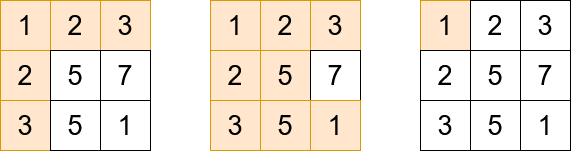

Example 1:


Input: grid = [[1,2,3],[2,5,7],[3,5,1]], queries = [5,6,2]
Output: [5,8,1]
Explanation: The diagrams above show which cells we visit to get points for each query.
Example 2:

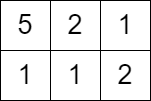

Input: grid = [[5,2,1],[1,1,2]], queries = [3]
Output: [0]
Explanation: We can not get any points because the value of the top left cell is already greater than or equal to 3.
 

Constraints:

m == grid.length
n == grid[i].length
2 <= m, n <= 1000
4 <= m * n <= 105
k == queries.length
1 <= k <= 104
1 <= grid[i][j], queries[i] <= 106

## Brute Force (Time Limit Exceeded)

In [98]:
grid = [[1,2,3],[2,5,7],[3,5,1]]; queries = [5,6,2]

In [99]:
import heapq
from collections import defaultdict

In [100]:
dir=[[0,1],[1,0],[-1,0],[0,-1]]
res=[]
m=len(grid)
n=len(grid[0])
for num in queries:
    visited=[[False]*n for _ in range(m)]
    pq=[]
    heapq.heappush(pq,(grid[0][0],0,0))#start from top left
    if grid[0][0]<num:
        visited[0][0]=True #mark that cell visited
        count=1    
        while pq:
            val,r,c=heapq.heappop(pq)
            for d in dir:
                nr=r+d[0]
                nc=c+d[1]
                #check for out of bounds and the condition concerning queries
                if 0<=nr<m and 0<=nc<n and grid[nr][nc]<num and visited[nr][nc]==False:
                    #mark visited
                    visited[nr][nc]=True
                    count+=1
                    heapq.heappush(pq,(grid[nr][nc],nr,nc))
    
        res.append(count)  
    else:
        res.append(0)
res

[5, 8, 1]

## Efficient Solution--- removing redundancies
answering the queries in increasing order removes redundancies as e dont have to re-traverse the elements already visited, we directly resume from the point where we left earlier in the previous iteration

In [101]:
map=defaultdict(int) # for mapping the query and their corresponding result
qsort=sorted(queries)
dir=[[0,1],[1,0],[-1,0],[0,-1]]
m=len(grid)
n=len(grid[0])
visited=[[False]*n for _ in range(m)] #to track visited cells
count=0
pq=[(grid[0][0],0,0)] #start with top left cell
visited[0][0]=True #mark visited
for num in qsort:
    while pq and pq[0][0]<num: #loop runs till queue is non empty and the min element (leftmost in a priority queue) < query
        count+=1 #increment count
        val,r,c=heapq.heappop(pq)
        for d in dir: #check all directions
            nr=r+d[0] #update next rows and columns
            nc=c+d[1]
            #check for out of bounds and if cell is visited
            if 0<=nr<m and 0<=nc<n and visited[nr][nc]==False:
                #mark visited
                visited[nr][nc]=True
                heapq.heappush(pq,(grid[nr][nc],nr,nc)) #mark the unvisited cell satisfying the condition in question and push it in the queue for exploring the cell
    map[num]=count
res=[map[q] for q in queries ]
res

[5, 8, 1]